## ws_4_1

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 로드
file_path = "data/seoul_subway_data.csv"  # 파일 경로는 실제 파일 위치에 맞게 수정하세요.
data = pd.read_csv(file_path)
data.head()

,Date,DayOfWeek,Time,PassengerCount
0,2023-09-01,Friday,08:00,1200
1,2023-09-01,Friday,09:00,900
2,2023-09-01,Friday,10:00,500
3,2023-09-02,Saturday,08:00,300
4,2023-09-02,Saturday,09:00,200


In [5]:
# 2. 요일별 및 시간대별 이용객 수 집계
weekday_agg = data.groupby('DayOfWeek')['PassengerCount'].sum()
time_agg = data.groupby('Time')['PassengerCount'].sum()

# 결과 확인
print(weekday_agg)
print(time_agg)

DayOfWeek
Friday       2600
Monday       3100
Saturday      650
Sunday        250
Thursday     4000
Tuesday      3400
Wednesday    3700
Name: PassengerCount, dtype: int64
Time
08:00    7400
09:00    6180
10:00    4120
Name: PassengerCount, dtype: int64


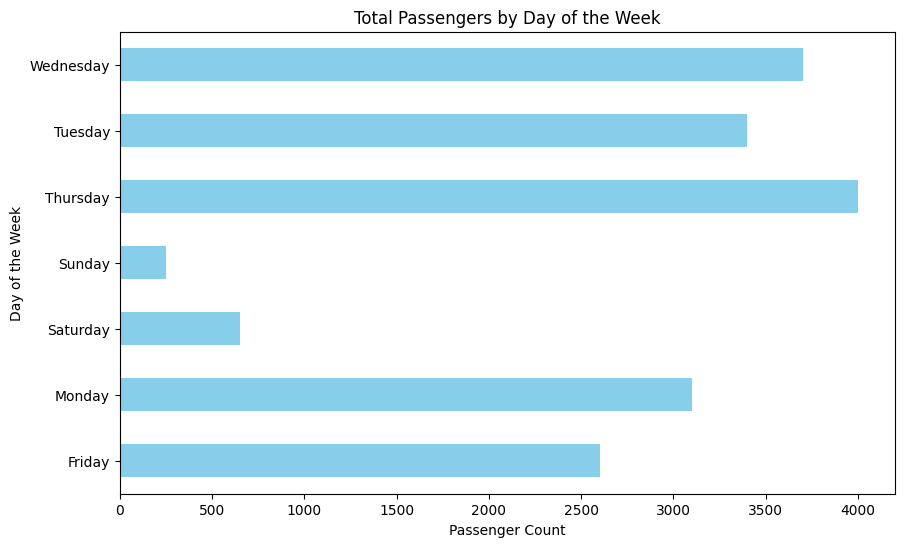

In [6]:
# 3. 요일별 이용객 수 가로 막대 그래프 시각화
plt.figure(figsize=(10, 6))
weekday_agg.plot(kind='barh', color='skyblue')
plt.title('Total Passengers by Day of the Week')
plt.xlabel('Passenger Count')
plt.ylabel('Day of the Week')
plt.show()

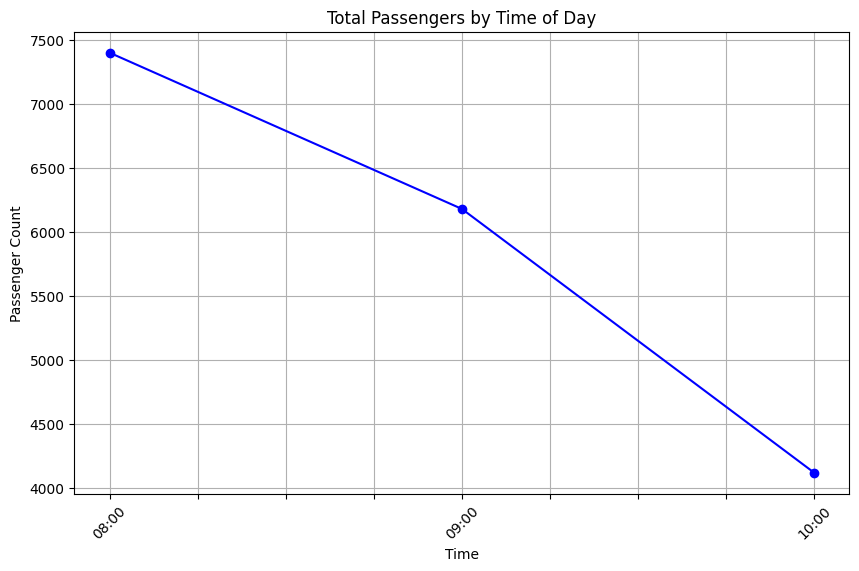

In [8]:
# 4. 시간대별 이용객 수 꺾은선 그래프 시각화
plt.figure(figsize=(10, 6))
time_agg.plot(kind='line', color='blue', marker='o')
plt.title('Total Passengers by Time of Day')
plt.xlabel('Time')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## ws_4_2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 경로
file_path = "data/survey_data.csv"

# CSV 파일을 Pandas의 데이터프레임으로 로드
df = pd.read_csv(file_path)

# 데이터프레임의 기본 정보를 출력하여 데이터 구조 확인 (행 개수, 열 개수, 데이터 타입, 결측치 확인 등)
print("데이터프레임 정보:")
df.info()  # 데이터프레임의 정보 출력

데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  1000 non-null   int64  
 1   Height  1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [11]:
# 데이터프레임의 상위 5개 행을 출력하여 데이터 내용 확인
print("\n데이터프레임 상위 5개 행:")
df.head()  # 상위 5개 행 출력


데이터프레임 상위 5개 행:


,Gender,Height
0,0,161.708780
1,1,169.380854
2,0,164.752119
3,0,157.115482
4,0,155.507927


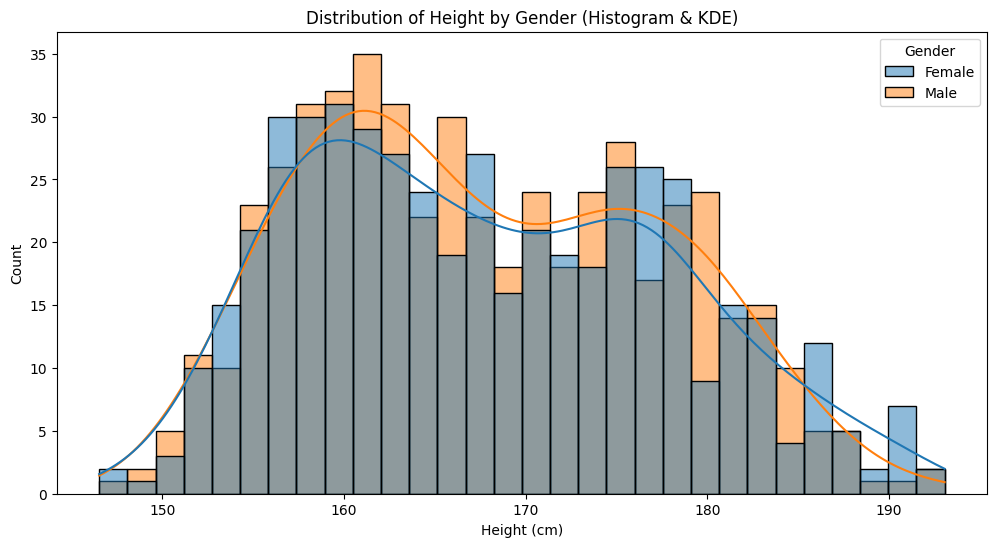

In [ ]:
# 성별 컬럼 변환 (0 -> Female, 1 -> Male)
# 기존 데이터에서 성별(Gender) 컬럼이 숫자로 저장되어 있으므로, 
# 사람이 이해하기 쉬운 문자형으로 변경
df["Gender"] = df["Gender"].map({0: "Female", 1: "Male"})

# 1. 히스토그램 및 KDE 플롯을 활용한 키(Height) 분포 분석
# 성별(Gender)별 키(Height)의 분포를 확인하기 위해 
# 히스토그램과 KDE(커널 밀도 추정) 곡선을 시각화

plt.figure(figsize=(12, 6))  # 그래프 크기 설정
sns.histplot(df, x="Height", hue="Gender", kde=True, bins=30, alpha=0.5)  # 히스토그램 + KDE 플롯 생성
plt.title("Distribution of Height by Gender (Histogram & KDE)")  # 그래프 제목
plt.xlabel("Height (cm)")  # X축 라벨 지정
plt.ylabel("Count")  # Y축 라벨 지정
plt.show()  # 그래프 표시

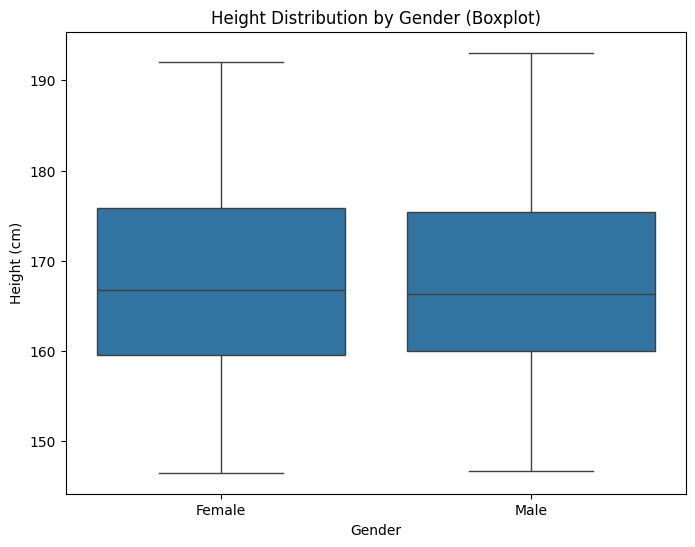

In [13]:
# 2. 박스플롯을 활용한 성별 간 키(Height) 분포 비교
# 박스플롯을 이용해 성별별 키의 중앙값, 사분위수, 이상치를 비교

plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.boxplot(x="Gender", y="Height", data=df)  # 박스플롯 생성
plt.title("Height Distribution by Gender (Boxplot)")  # 그래프 제목
plt.xlabel("Gender")  # X축 라벨 지정
plt.ylabel("Height (cm)")  # Y축 라벨 지정
plt.show()  # 그래프 표시

In [15]:
# 3. 성별별 키의 통계값 계산
# 성별별로 키(Height)의 평균, 중앙값, 표준편차, 최소값, 최대값을 계산하여 비교
stats = df.groupby("Gender")["Height"].agg(["mean", "median", "std", "min", "max"])

# 계산된 통계 데이터를 출력하여 성별 간 차이를 확인
print("\n성별별 키의 기초 통계:")
stats


성별별 키의 기초 통계:


,mean,median,std,min,max
Gender,,,,,
Female,167.859719,166.793699,10.050468,146.515567,192.078267
Male,167.690750,166.325366,9.641423,146.745151,193.057965


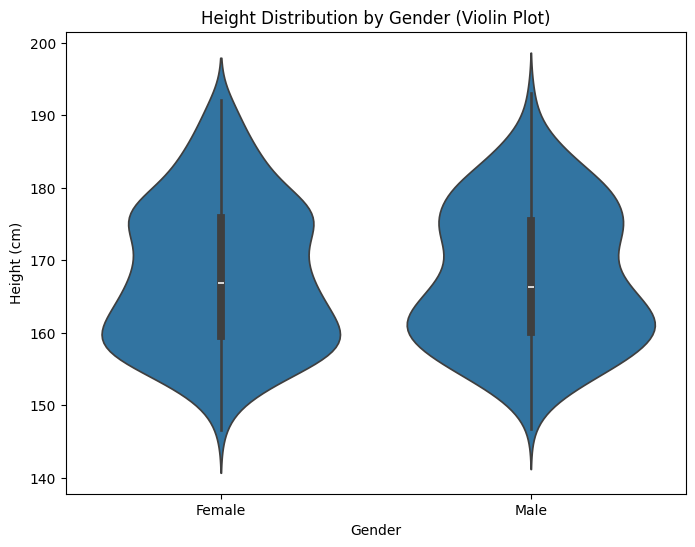

In [16]:
# 4. 바이올린 플롯을 활용한 성별별 키 분포 밀도 분석
# 박스플롯보다 더 자세한 분포를 확인할 수 있는 바이올린 플롯을 사용하여 시각화

plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.violinplot(x="Gender", y="Height", data=df)  # 바이올린 플롯 생성
plt.title("Height Distribution by Gender (Violin Plot)")  # 그래프 제목
plt.xlabel("Gender")  # X축 라벨 지정
plt.ylabel("Height (cm)")  # Y축 라벨 지정
plt.show()  # 그래프 표시

## ws_4_3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
gdp_file = "data/gdp_data.csv"
pop_file = "data/population_data.csv"

gdp_df = pd.read_csv(gdp_file)  # GDP 데이터 로드
population_df = pd.read_csv(pop_file)  # 인구 데이터 로드

# 데이터 확인
gdp_df.head()  # GDP 데이터의 상위 5개 행 출력

,Country,Year,GDP
0,USA,2000,3.794460e+12
1,USA,2001,3.953675e+12
2,USA,2002,4.119570e+12
3,USA,2003,4.292426e+12
4,USA,2004,4.472536e+12


In [21]:
population_df.head()  # 인구 데이터의 상위 5개 행 출력

,Country,Year,Population
0,USA,2000,1323642419
1,USA,2001,1362046958
2,USA,2002,1401565779
3,USA,2003,1442231209
4,USA,2004,1484076518


In [22]:
print(gdp_df.info())  # GDP 데이터의 구조 확인
print(population_df.info())  # 인구 데이터의 구조 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  210 non-null    object 
 1   Year     210 non-null    int64  
 2   GDP      210 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     210 non-null    object
 1   Year        210 non-null    int64 
 2   Population  210 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.0+ KB
None


In [ ]:
# CSV 파일을 데이터프레임으로 읽어오기
gdp_df = pd.read_csv(gdp_file)
population_df = pd.read_csv(pop_file)

# 데이터 확인 (각 데이터프레임의 상위 5개 행 출력)
print("GDP 데이터 샘플")
gdp_df.head()

GDP 데이터 샘플


,Country,Year,GDP
0,USA,2000,3.794460e+12
1,USA,2001,3.953675e+12
2,USA,2002,4.119570e+12
3,USA,2003,4.292426e+12
4,USA,2004,4.472536e+12


In [25]:
print("\n인구 데이터 샘플")
population_df.head()


인구 데이터 샘플


,Country,Year,Population
0,USA,2000,1323642419
1,USA,2001,1362046958
2,USA,2002,1401565779
3,USA,2003,1442231209
4,USA,2004,1484076518


In [26]:
# 2. 데이터 병합 (국가와 연도를 기준으로 GDP와 인구 데이터를 하나로 합침)
# 병합을 통해 동일한 국가 및 연도 데이터를 연결
merged_df = pd.merge(gdp_df, population_df, on=["Country", "Year"])  # 두 개의 데이터프레임을 특정 열을 기준으로 병합

# 3. 1인당 GDP(GDP per Capita) 계산
# 1인당 GDP = 총 GDP / 총 인구
merged_df["GDP_per_Capita"] = merged_df["GDP"] / merged_df["Population"]  # GDP와 인구수를 사용하여 1인당 GDP 계산

# 병합된 데이터 확인 (상위 5개 행 출력)
print("\n병합된 데이터 샘플")
merged_df.head()


병합된 데이터 샘플


,Country,Year,GDP,Population,GDP_per_Capita
0,USA,2000,3.794460e+12,1323642419,2866.680356
1,USA,2001,3.953675e+12,1362046958,2902.744680
2,USA,2002,4.119570e+12,1401565779,2939.262708
3,USA,2003,4.292426e+12,1442231209,2976.240155
4,USA,2004,4.472536e+12,1484076518,3013.682796


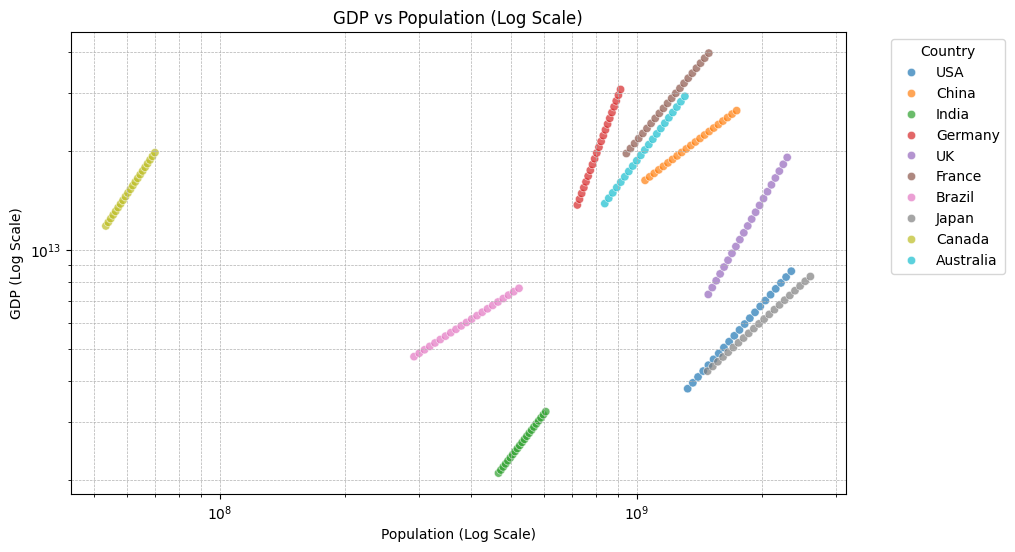

In [28]:
# 4. GDP vs 인구 관계 (산점도)
# 국가별 GDP와 인구 관계를 시각적으로 분석
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.scatterplot(data=merged_df, x="Population", y="GDP", hue="Country", alpha=0.7)  # 산점도 생성
plt.xscale("log")  # X축을 로그 스케일로 설정하여 값의 차이를 균형 있게 표현
plt.yscale("log")  # Y축을 로그 스케일로 설정하여 값의 차이를 균형 있게 표현
plt.xlabel("Population (Log Scale)")
plt.ylabel("GDP (Log Scale)")
plt.title("GDP vs Population (Log Scale)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # 격자 추가
plt.show()  # 그래프 출력

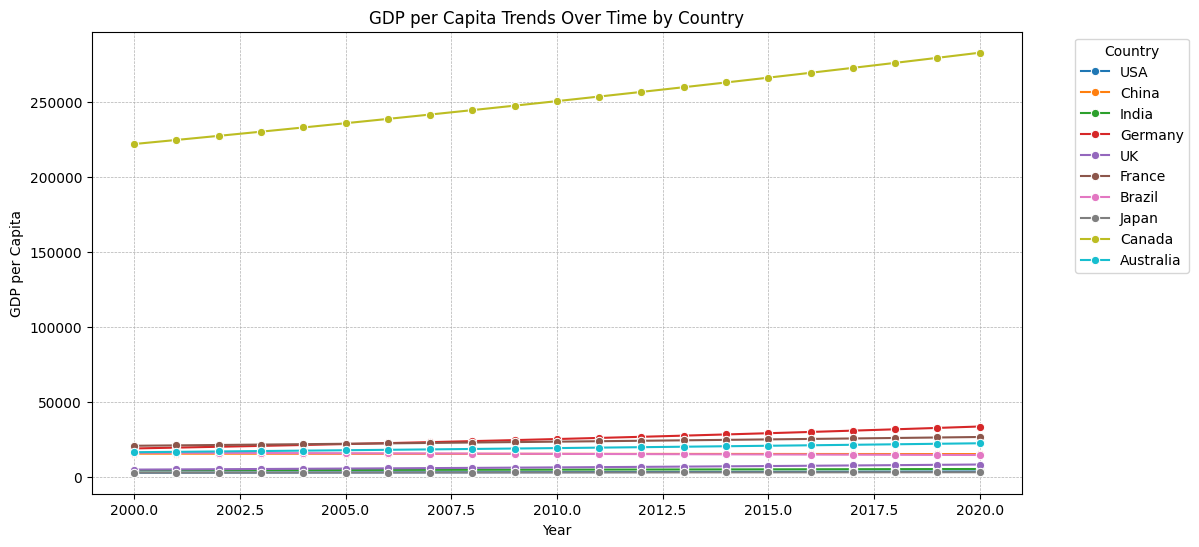

In [29]:
# 5. 연도별 1인당 GDP 변화 (국가별 선 그래프)
# 각 국가별 연도별 1인당 GDP 변화를 선 그래프로 표현
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
sns.lineplot(data=merged_df, x="Year", y="GDP_per_Capita", hue="Country", marker="o")  # 선 그래프 생성
plt.xlabel("Year")  # X축: 연도
plt.ylabel("GDP per Capita")  # Y축: 1인당 GDP
plt.title("GDP per Capita Trends Over Time by Country")  # 그래프 제목 설정
plt.grid(True, linestyle="--", linewidth=0.5)  # 격자 추가
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 위치 조정
plt.show()  # 그래프 출력

In [30]:
# 6. 국가별 총 GDP 대비 인구수 비율 (막대 그래프)
# 국가별 평균 인구수 및 GDP 계산하여 비교 분석
country_stats = merged_df.groupby("Country").agg({"Population": "mean", "GDP": "mean"}).reset_index()  # 특정 열을 기준으로 평균 계산
country_stats

,Country,Population,GDP
0,Australia,1.054325e+09,2.068766e+13
1,Brazil,3.965570e+08,6.094122e+12
2,Canada,6.128778e+07,1.549530e+13
3,China,1.363099e+09,2.103197e+13
4,France,1.196093e+09,2.857689e+13
5,Germany,8.133220e+08,2.117374e+13
6,India,5.324991e+08,2.628457e+12
7,Japan,1.991586e+09,6.093789e+12
8,UK,1.860350e+09,1.235465e+13
9,USA,1.788457e+09,5.902401e+12


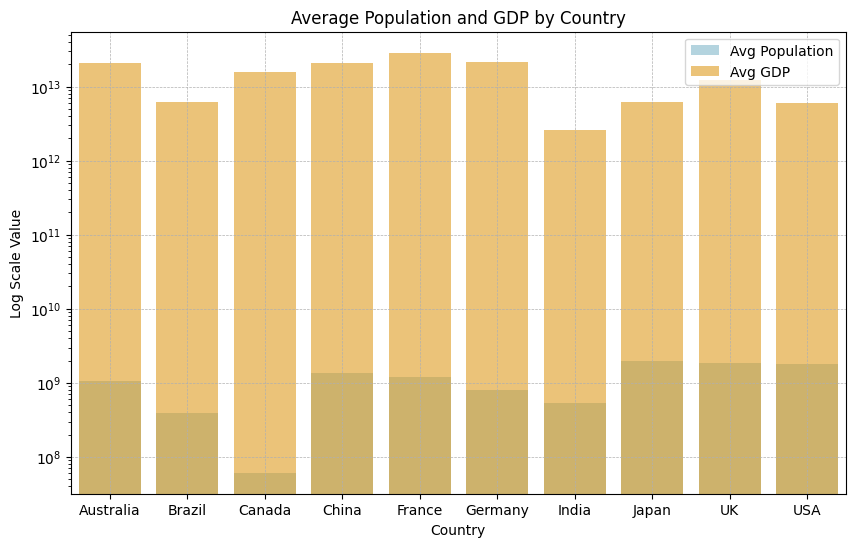

In [31]:
# 국가별 평균 GDP와 인구를 비교하는 막대 그래프
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.barplot(data=country_stats, x="Country", y="Population", color="lightblue", label="Avg Population")  # 인구수 막대그래프
sns.barplot(data=country_stats, x="Country", y="GDP", color="orange", alpha=0.6, label="Avg GDP")  # GDP 막대그래프

# 그래프 제목 및 범례 설정
plt.yscale("log")  # 데이터 차이가 커서 로그 스케일 적용하여 시각적 균형 유지
plt.xlabel("Country")  # X축: 국가명
plt.ylabel("Log Scale Value")  # Y축: 값 (로그 스케일)
plt.title("Average Population and GDP by Country")  # 그래프 제목
plt.legend()  # 범례 추가
plt.grid(True, linestyle="--", linewidth=0.5)  # 격자 추가
plt.show()  # 그래프 출력


## ws_4_4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
file_path = "data/time_series_data.csv"
df = pd.read_csv(file_path)

# 2. 데이터 확인
print(df.info())  # 데이터 타입 및 결측치 확인
df.head()  # 상위 5개 행 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    21 non-null     int64  
 1   Value   21 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes
None


,Year,Value
0,2000,51.561810
1,2001,54.063663
2,2002,56.332164
3,2003,58.470520
4,2004,59.913605


In [ ]:
# 3. 이동 평균(Moving Average) 계산
# 행을 윈도우 개수만큼 집계 함수에 맞게 계산
# ex) window=3 => (1,2,3),(2,3,4),(3,4,5),(4,5,6)...
window_size = 3  # 이동 평균 윈도우 크기 (3년 기준)
df["Moving_Avg"] = df["Value"].rolling(window=window_size).mean()  # 이동 평균 추가

# 4. 변동률(Cumulative Growth Rate, CAGR) 계산
# (현재행 - 이전행) / 이전행
df["Pct_Change"] = df["Value"].pct_change() * 100  # 연도별 변동률(%) 계산
df

,Year,Value,Moving_Avg,Pct_Change
0,2000,51.561810,NaN,NaN
1,2001,54.063663,NaN,4.852143
2,2002,56.332164,53.985879,4.195982
3,2003,58.470520,56.288782,3.795975
4,2004,59.913605,58.238763,2.468056
5,2005,61.392263,59.925462,2.467984
6,2006,62.727084,61.344317,2.174251
7,2007,65.611607,63.243651,4.598528
8,2008,68.107043,65.481911,3.803345
9,2009,70.915926,68.211525,4.124218


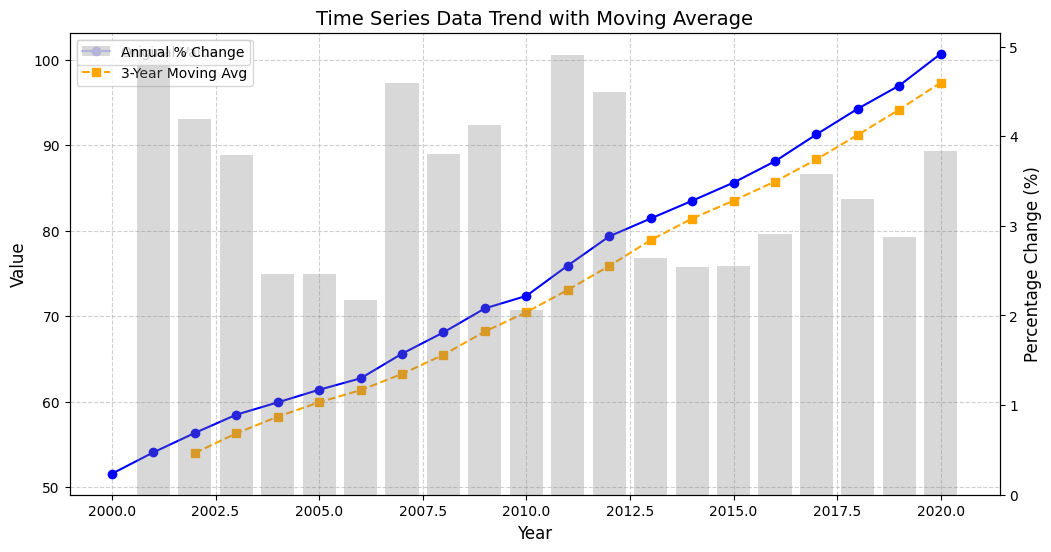

In [34]:
# 5. 시각화: 원본 데이터와 이동 평균선 표시
plt.figure(figsize=(12, 6))  # 그래프 크기 설정

# 5.1 원본 데이터 시각화 (파란색 선)
plt.plot(df["Year"], df["Value"], marker='o', linestyle='-', color='b', label="Original Value")

# 5.2 이동 평균선 시각화 (주황색 선)
plt.plot(df["Year"], df["Moving_Avg"], marker='s', linestyle='--', color='orange', label=f"{window_size}-Year Moving Avg")

# 6. 그래프 스타일 설정
plt.xlabel("Year", fontsize=12)  # x축 레이블 설정
plt.ylabel("Value", fontsize=12)  # y축 레이블 설정
plt.title("Time Series Data Trend with Moving Average", fontsize=14)  # 그래프 제목 설정
plt.grid(True, linestyle="--", alpha=0.6)  # 격자 스타일 설정
plt.legend()  # 범례 표시

# 7. 변동률(%) 바 그래프 추가 (보조 축 사용)
ax2 = plt.gca().twinx()  # 새로운 y축 추가
ax2.bar(df["Year"], df["Pct_Change"], alpha=0.3, color="gray", label="Annual % Change")  # 변동률 막대 그래프
ax2.set_ylabel("Percentage Change (%)", fontsize=12)  # 보조 y축 레이블 설정
ax2.legend(loc="upper left")  # 범례 위치 설정

# 8. 그래프 출력
plt.show()

## ws_4_5

In [ ]:
import pandas as pd
import plotly.express as px

# 1. 데이터 로드
data = pd.read_csv('data/world_data.csv')

# 데이터 확인
data.head()

,Country,Year,Population,GDP,LifeExpectancy
0,USA,2000,1283642419,3794459720974,74.64
1,USA,2001,1291179009,3968949030285,74.89
2,USA,2002,1324059435,3952537491226,75.37
3,USA,2003,1352166606,4102626826157,75.03
4,USA,2004,1323905931,4256241754841,75.57


In [36]:
# 2. 3D 산점도 작성
fig = px.scatter_3d(data, x='Population', y='GDP', z='LifeExpectancy',
                    color='Country', size='Population', hover_name='Country')

# 3D 그래프 출력
fig.show()

In [37]:
# 3. 3D 산점도 작성 및 Hover 기능 추가
fig = px.scatter_3d(data, x='Population', y='GDP', z='LifeExpectancy',
                    color='Country', size='Population', hover_name='Country')

# Hover에 추가 정보 표시 (연도)
fig.update_traces(marker=dict(size=5),
                  selector=dict(mode='markers'))

# 3D 그래프 출력
fig.show()

In [38]:
# 4. 3D 산점도 작성 및 필터 기능 추가
fig = px.scatter_3d(data, x='Population', y='GDP', z='LifeExpectancy',
                    color='Country', size='Population', hover_name='Country',
                    animation_frame='Year', animation_group='Country')

# 3D 그래프 출력
fig.show()